In [612]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

In [613]:
# reading whole data from csv file
# date should be parsed as datetime in order to automatically sort in dataframes, and this is important because working with time-series
df = pd.read_csv('BP_data.csv', skiprows=[1], parse_dates=['Date'])
df.head()

,SampleID,Dataset,Date,Time,SiteNumber,latitude,Longitude,BottomDepth,sampledepth,SecchiDiskDepth,...,Diatom_Synedra,Diatom_Cocconeis,Diatom_Nitzchia,Diatom_Navicula,Diatom_Fragillaria,Diatom_Tabellaria,Diatom_Gomphenema,Diatom_Astrionella,Flagellates,Other
0,1,Buoy,2014-06-11,6:15:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Buoy,2014-06-11,6:30:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Buoy,2014-06-11,6:45:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Buoy,2014-06-11,7:00:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Buoy,2014-06-11,7:15:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [614]:
# drop the measurements not coming with buoy data as well as rows from other datasets
filt_dataset_buoy = df['Dataset'] == 'Buoy'
df_buoy = df[filt_dataset_buoy].drop(['SampleID','Dataset','Time','SiteNumber','latitude','Longitude','BottomDepth','sampledepth','SecchiDiskDepth','SamplingInScum','Lab_Chla','TSS','PARExtinction','TurbidityLab','DOC','Lab_chlaOutlier','biomassCyanobacteria','biomassChlorophyte','biomassEuglenophyte','biomassChrysophyte','biomassDiatom','biomassCryptophyte','biomassDinoflagellate','biomassTotal','Cyanobacteria','Chlorophyte','Euglenophyte','Chrysophyte','Diatom','Cryptophyte','Dinoflagellate','cellcountTotal','Bluegreen_Anabaena','Bluegreen_AgmenellumMerismopedia','Bluegreen_Anacystis','Bluegreen_Gomphosphaeria','Bluegreen_Oscillatoria','Bluegreen_Aphanizomenon','Green_Chlorella','Green_Clostrium','Green_Scenedesmus','Green_Ankistrodesmus','Green_Oocystis','Green_Chodetella','Green_Botryococcus','Green_Mougeotia','Green_Phytoconis','Green_Sphaerocystis','Green_Spirogyra','Green_Tetraedron','Green_Polyedriopsis','Green_Ulothrix','Green_Pediastrum','Green_Schroderia','Diatom_Cyclotella','Diatom_Synedra','Diatom_Cocconeis','Diatom_Nitzchia','Diatom_Navicula','Diatom_Fragillaria','Diatom_Tabellaria','Diatom_Gomphenema','Diatom_Astrionella','Flagellates','Other'], axis=1)
df_buoy

,Date,TurbShallowField,Bat,WindDir,WindSp,AirTemp,RelativeHum,BarometricPress,DailyRain,PARAirFlags,...,ODOSatDeep,ODODeep,CDOM,CDOMmV,Temp00,Temp01,Temp02,Temp03,Temp04,shallow_sonde_biofouling_outlier
0,2014-06-11,7.1,12.5,269.0,3.4,17.50,31.0,957.0,0.0,405.0,...,98.3,9.45,36.4,90.70,NaN,17.26,17.25,17.28,NaN,0.0
1,2014-06-11,7.5,12.6,198.0,4.5,17.56,38.0,957.0,0.0,410.0,...,98.4,9.45,36.5,90.91,NaN,17.27,17.24,17.27,NaN,0.0
2,2014-06-11,7.8,12.6,242.0,3.8,17.50,35.0,957.3,0.0,352.0,...,97.9,9.41,36.5,90.99,NaN,17.26,17.25,17.27,NaN,0.0
3,2014-06-11,7.3,12.6,220.0,3.1,17.17,37.0,957.3,0.0,271.0,...,97.3,9.36,36.5,91.18,NaN,17.25,17.24,17.27,NaN,0.0
4,2014-06-11,7.0,12.3,223.0,3.2,17.17,44.0,957.3,0.0,82.0,...,97.7,9.38,36.5,91.62,NaN,17.21,17.23,17.27,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109163,2019-10-03,5.7,11.2,112.0,9.5,5.00,85.0,28.4,0.0,253.0,...,NaN,NaN,77.5,78.04,8.66,8.53,8.53,8.57,8.53,0.0
109164,2019-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
109165,2019-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
109166,2019-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [615]:
# drop the buoy observations associated with biofouling error
filt_biofouling = df_buoy['shallow_sonde_biofouling_outlier'] == 1
df_buoy.drop(df_buoy[filt_biofouling].index, axis=0, inplace=True)
# drop the associated column 
df_buoy.drop('shallow_sonde_biofouling_outlier', axis=1, inplace=True)


Check the type of features to see if al are numerical

In [616]:
# exploring data types in df_buoy
df_buoy.dtypes

Date                  datetime64[ns]
TurbShallowField             float64
Bat                          float64
WindDir                      float64
WindSp                       float64
AirTemp                      float64
RelativeHum                  float64
BarometricPress              float64
DailyRain                    float64
PARAirFlags                  float64
PARW1                        float64
PARW2                        float64
CO2Shallow                   float64
CO2Deep                      float64
TempShallow                  float64
SpCondShallow                float64
pHShallow                    float64
pHmVShallow                  float64
ChlRFUShallow                float64
ChlorophyllShallow           float64
BGAPCShallowRFU              float64
BGAPCShallow                 float64
ODOSatShallow                float64
ODOShallow                   float64
TempDeep                     float64
SpCondDeep                   float64
pHDeep                       float64
p

In [617]:
# Extract date elements as three features
df_buoy['Year'] = pd.DatetimeIndex(df_buoy["Date"]).year
df_buoy['Month'] = pd.DatetimeIndex(df_buoy["Date"]).month
df_buoy['Day'] = pd.DatetimeIndex(df_buoy["Date"]).day
df_buoy.index = df_buoy["Date"]
df_buoy.drop(["Date"], axis=1, inplace = True)
df_buoy.head()

,TurbShallowField,Bat,WindDir,WindSp,AirTemp,RelativeHum,BarometricPress,DailyRain,PARAirFlags,PARW1,...,CDOM,CDOMmV,Temp00,Temp01,Temp02,Temp03,Temp04,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-11,7.1,12.5,269.0,3.4,17.50,31.0,957.0,0.0,405.0,NaN,...,36.4,90.70,NaN,17.26,17.25,17.28,NaN,2014,6,11
2014-06-11,7.5,12.6,198.0,4.5,17.56,38.0,957.0,0.0,410.0,NaN,...,36.5,90.91,NaN,17.27,17.24,17.27,NaN,2014,6,11
2014-06-11,7.8,12.6,242.0,3.8,17.50,35.0,957.3,0.0,352.0,NaN,...,36.5,90.99,NaN,17.26,17.25,17.27,NaN,2014,6,11
2014-06-11,7.3,12.6,220.0,3.1,17.17,37.0,957.3,0.0,271.0,NaN,...,36.5,91.18,NaN,17.25,17.24,17.27,NaN,2014,6,11
2014-06-11,7.0,12.3,223.0,3.2,17.17,44.0,957.3,0.0,82.0,NaN,...,36.5,91.62,NaN,17.21,17.23,17.27,NaN,2014,6,11


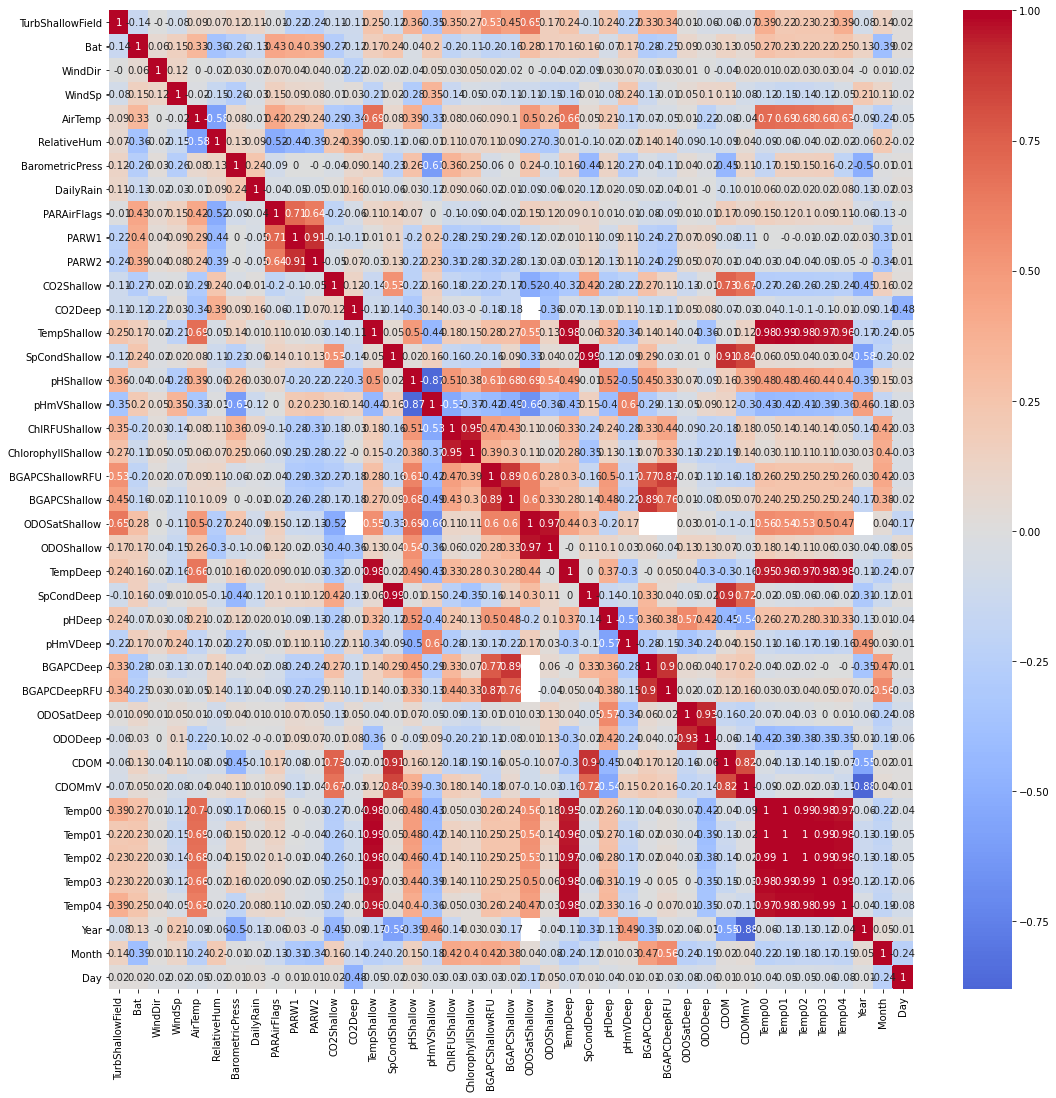

In [618]:
# first creating a heat map to see the relation between parameters
correlation_matrix = df_buoy.corr().round(2)  # it seems that this function is working even with nan values in data
plt.figure(figsize=(18,18))
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

from the above heat map we can see that some adjacent parameters have very high correlation, and based on our knowledge we know that these are not a seperate observation, but just a calculated parameters based on calibration factors. the reason that their correaltion with the original parameter (e.g. 'BGAPCShallow' and 'BGAPCShallowRFU' is not 1 is because the calibration factors are computed for each year (different year by year) and above correlation is four all years). So for feature reduction I decided to eliminate these calculated features in further analyses. 

In [619]:
# drop the features which are not independent measurements
df_buoy.drop(['BGAPCDeep', 'BGAPCShallow', 'ChlorophyllShallow', 'pHDeep', 'pHShallow', 'ODOSatDeep'], axis = 1, inplace=True)

In [620]:
df_buoy.isnull().sum() / len(df_buoy)

TurbShallowField    0.084714
Bat                 0.040387
WindDir             0.135847
WindSp              0.135865
AirTemp             0.097620
RelativeHum         0.092548
BarometricPress     0.091093
DailyRain           0.091093
PARAirFlags         0.040609
PARW1               0.156550
PARW2               0.156337
CO2Shallow          0.342203
CO2Deep             0.986232
TempShallow         0.065448
SpCondShallow       0.066356
pHmVShallow         0.065364
ChlRFUShallow       0.065819
BGAPCShallowRFU     0.065809
ODOSatShallow       0.834392
ODOShallow          0.154232
TempDeep            0.191754
SpCondDeep          0.195861
pHmVDeep            0.281716
BGAPCDeepRFU        0.393938
ODODeep             0.391806
CDOM                0.577413
CDOMmV              0.577394
Temp00              0.305701
Temp01              0.232002
Temp02              0.231937
Temp03              0.231909
Temp04              0.305794
Year                0.000000
Month               0.000000
Day           

In [621]:
# drop the unrelated parameters to chla (based on my judgement) and features with more than %50 of data stored as nan (temp00 and temp04 are also deleted because we have some other temp measurements)
df_buoy = df_buoy.drop(['Bat', 'CO2Deep', 'ODOSatShallow', 'CDOM', 'CDOMmV', 'Temp00', 'Temp04'], axis=1).copy()
df_buoy.isnull().sum()

TurbShallowField     9137
WindDir             14652
WindSp              14654
AirTemp             10529
RelativeHum          9982
BarometricPress      9825
DailyRain            9825
PARAirFlags          4380
PARW1               16885
PARW2               16862
CO2Shallow          36909
TempShallow          7059
SpCondShallow        7157
pHmVShallow          7050
ChlRFUShallow        7099
BGAPCShallowRFU      7098
ODOShallow          16635
TempDeep            20682
SpCondDeep          21125
pHmVDeep            30385
BGAPCDeepRFU        42489
ODODeep             42259
Temp01              25023
Temp02              25016
Temp03              25013
Year                    0
Month                   0
Day                     0
dtype: int64

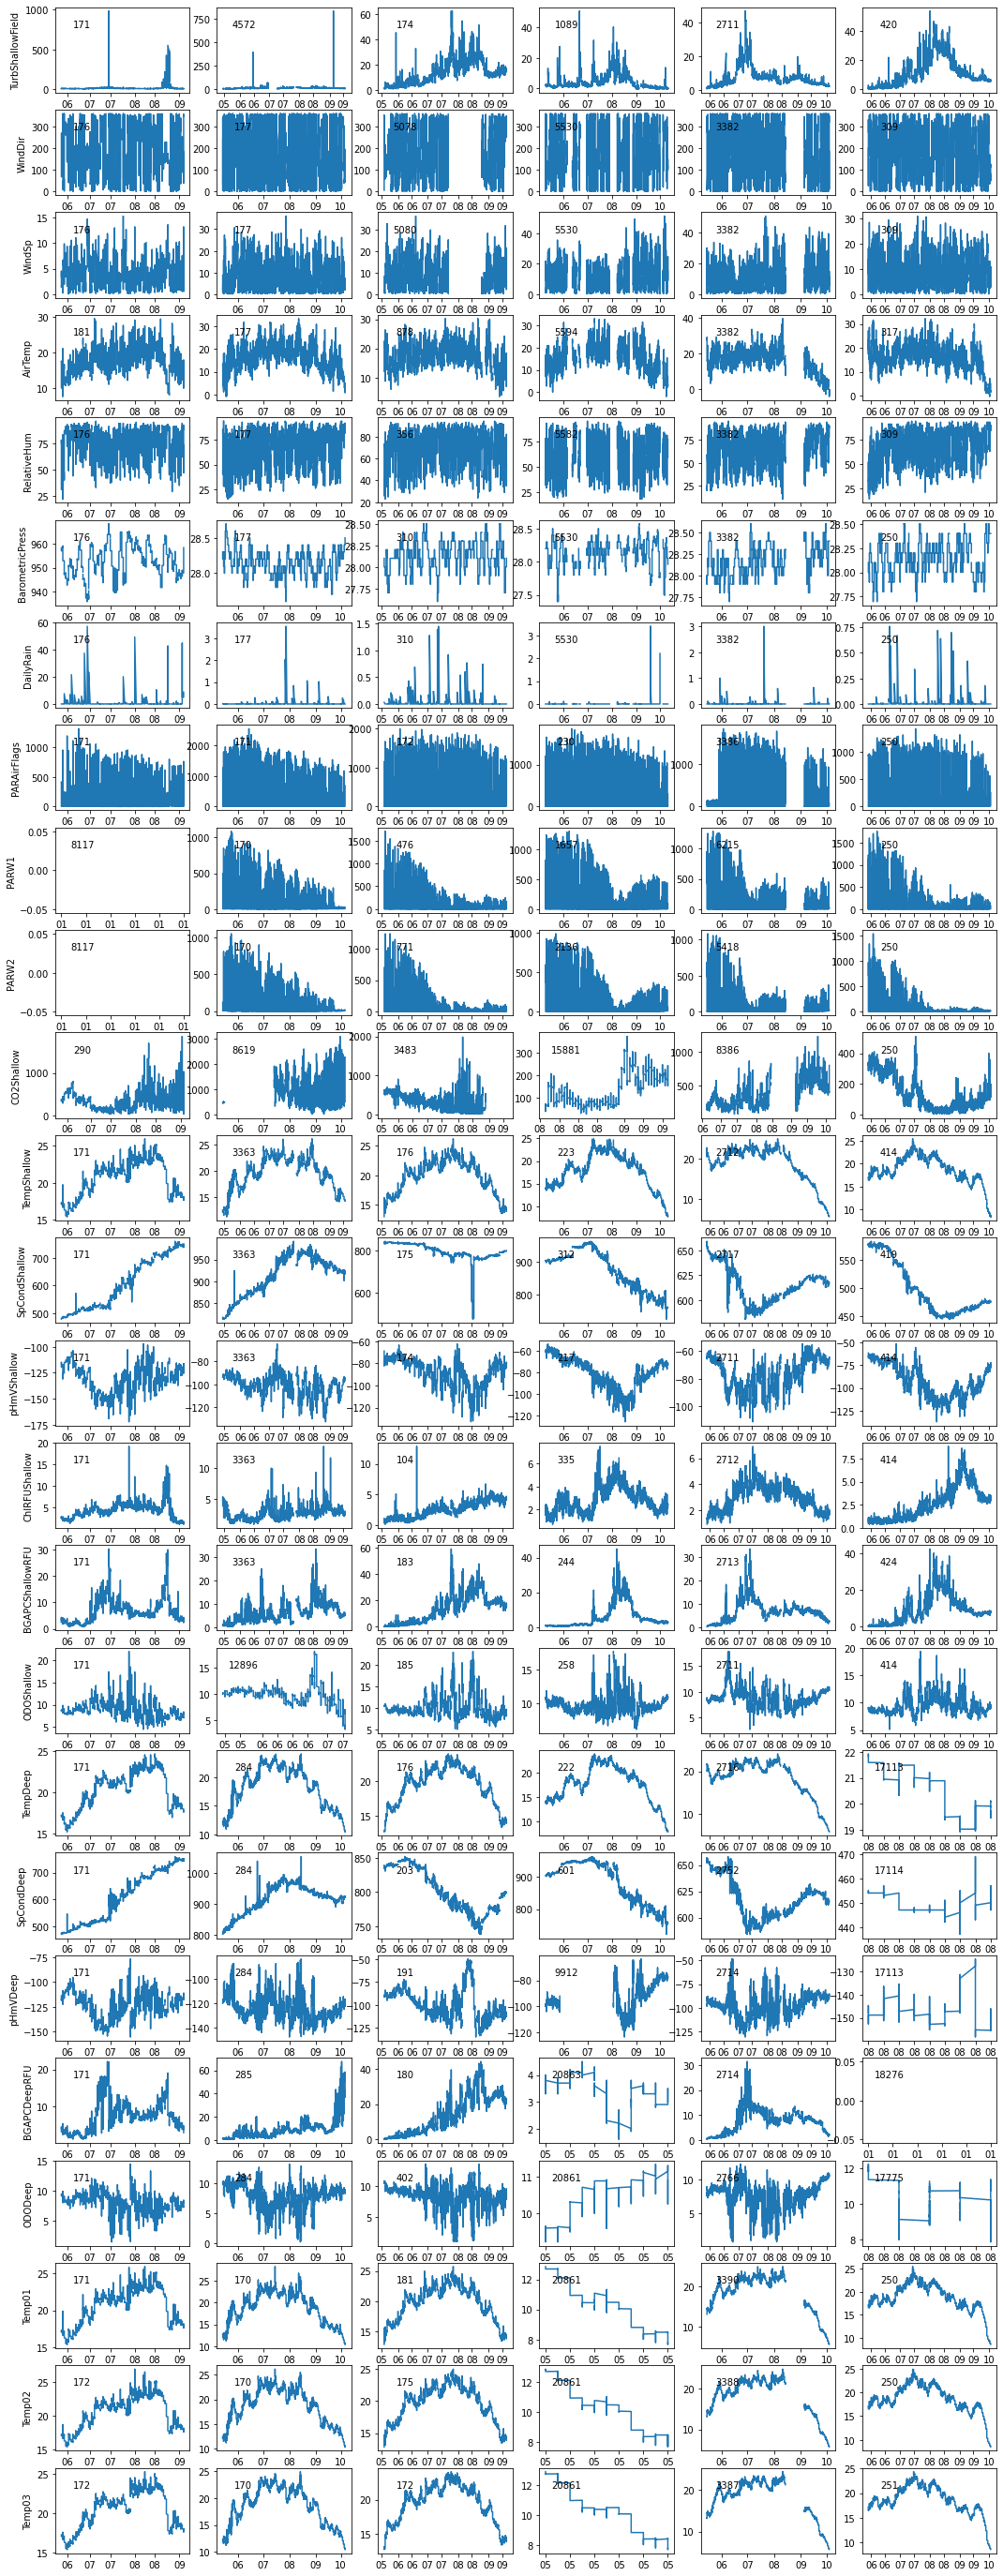

In [622]:
# plot all features to see the time distribution of missing values to select the best approach to impute missing values
plt.figure(figsize = [18 , 56])
myFmt = mdates.DateFormatter('%m')
years = df_buoy['Year'].unique()
features = df_buoy.columns
i = 0
for feature in features[:-3]:  # to not include day, month and year features
    for year in years:
        i += 1
        ax = plt.subplot(len(features), len(years), i)
        filt_year = df_buoy['Year'] == year
        ax.plot(df_buoy[filt_year][feature]) # the x-axis is the index
        ax.xaxis.set_major_formatter(myFmt)
        ax.text(.2, .8, str(df_buoy[filt_year][feature].isnull().sum()), horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
        if year == 2014:
            plt.ylabel(feature)

# investigating above features one by one for select imputing method

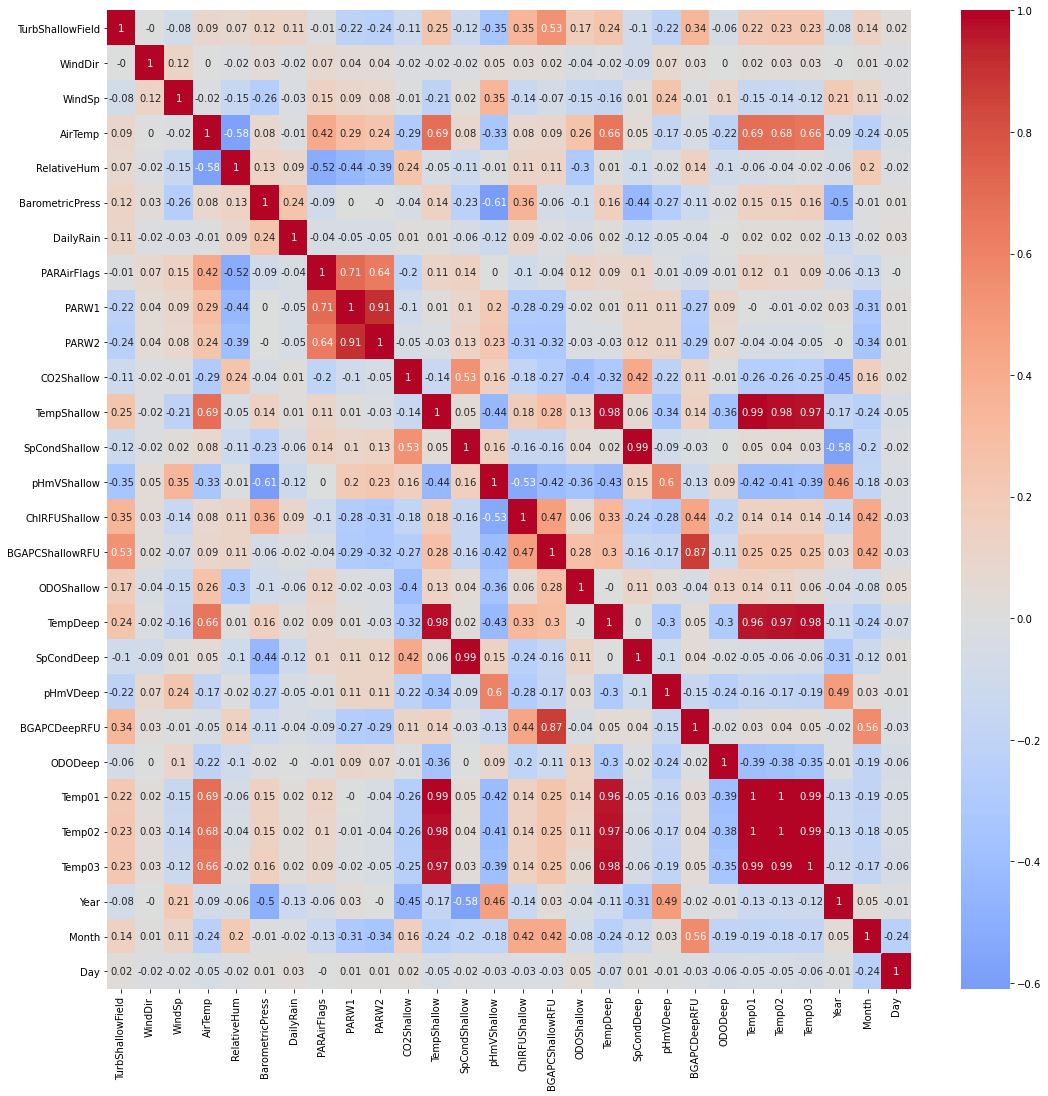

In [623]:
# plot again the heatmap
correlation_matrix = df_buoy.corr().round(2)  # it seems that this function is working even with nan values in data
plt.figure(figsize=(18,18))
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

For turbidity there are some correalted parameters we can use to build a model to predict missing observations, but there are just few missing valus so for now just a interpolation 

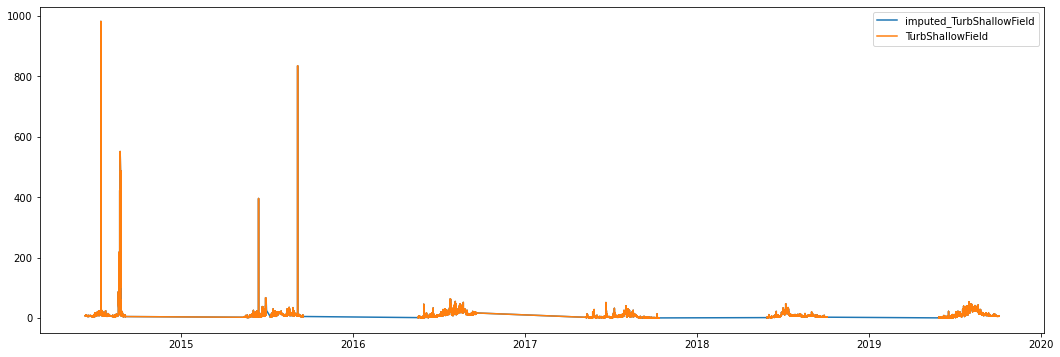

In [624]:
# create a new dataframe for imputed data
imputed_df_buoy = df_buoy.copy()

# impute TurbShallowField with interpolation with 'time' method
imputed_df_buoy.TurbShallowField = df_buoy.TurbShallowField.interpolate(method='time')
plt.figure(figsize = [18 , 6])
plt.plot(imputed_df_buoy.TurbShallowField)
plt.plot(df_buoy.TurbShallowField)
plt.legend(['imputed_TurbShallowField' , 'TurbShallowField'])

the reason to connect each year to the next one in some cases is that , the two points in two successive years are connected to each other before imputing if both exist (non-missing). if one of them are missing (e.g. the lst measuremt in the previous year or the first measuremtn in the later year are missing) the line is not connected in it will be connected after impution of the missing value in impution algorithm.

for wind direction I think a median or mean method over month makes more sense than interpolation because the missing values are suucessive in most cases which make interpolation hard. Also it seems there is a relation between these two parameters and month in plot a couple of lines above. I chose median over mean because I think median makes more sense for direction. form a wind_rose for BPL I saw the wind direction is more in a same direction. 

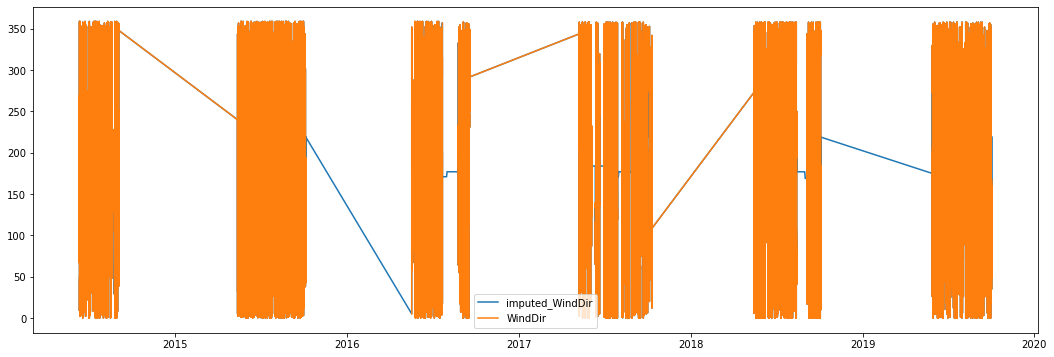

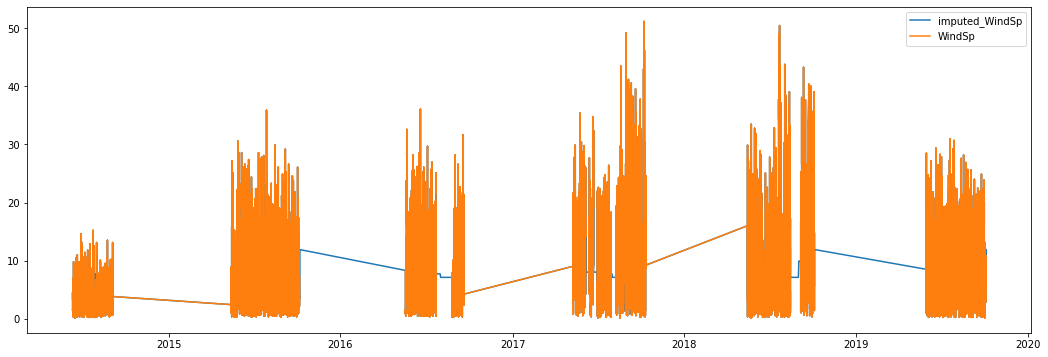

In [625]:
# impute winddir and windspeed based on median over month
imputed_df_buoy.WindDir = df_buoy.WindDir.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.median()))
imputed_df_buoy.WindSp = df_buoy.WindSp.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.median()))

plt.figure(figsize = [18 , 6])
plt.plot(imputed_df_buoy.WindDir)
plt.plot(df_buoy.WindDir)
plt.legend(['imputed_WindDir' , 'WindDir'])

plt.figure(figsize = [18 , 6])
plt.plot(imputed_df_buoy.WindSp)
plt.plot(df_buoy.WindSp)
plt.legend(['imputed_WindSp' , 'WindSp'])

for these parameters below, it seems a monthly mean or median would be enough, based on their pattern, number and succesive of mising values, their nature, and the correlation with other parameters.

In [626]:
# impute winddir and windspeed based on median over month
imputed_df_buoy.AirTemp = df_buoy.AirTemp.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.RelativeHum = df_buoy.RelativeHum.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.BarometricPress = df_buoy.BarometricPress.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.DailyRain = df_buoy.DailyRain.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.median()))
imputed_df_buoy.PARAirFlags = df_buoy.PARAirFlags.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.median()))

for PARW1 & PARW2, it seems that an ML model to predict it based on PARAirFlags and some water parameters would be the best method because of its good corelation with other parameters, having missing values for whole a year. however, for now just keep it as simple as I can with a monthly average.

In [627]:
imputed_df_buoy.PARW1 = df_buoy.PARW1.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.PARW2 = df_buoy.PARW2.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))

I dont know yet how to deal with CO2shallow, so keep it simple for now

In [628]:
imputed_df_buoy.CO2Shallow = df_buoy.CO2Shallow.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))

Tempshallow can be estimated from Airtemp, but the number of missing values are few, so keep it simple

In [629]:
imputed_df_buoy.TempShallow = df_buoy.TempShallow.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))

maybe the best option?

In [630]:
# impute with interpolation with 'time' method
imputed_df_buoy.SpCondShallow = df_buoy.SpCondShallow.interpolate(method='time')
imputed_df_buoy.pHmVShallow = df_buoy.pHmVShallow.interpolate(method='time')
imputed_df_buoy.ChlRFUShallow = df_buoy.ChlRFUShallow.interpolate(method='time')
imputed_df_buoy.BGAPCShallowRFU = df_buoy.BGAPCShallowRFU.interpolate(method='time')

I dont know yet how to deal with ODOShallow, so keep it simple for now

In [631]:
imputed_df_buoy.ODOShallow = df_buoy.ODOShallow.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))

I know that interpolation is not good for features below because there is suucessive misssig data. and maybe the best method is to corrolate with shallow sensor for each parameter but method below is just for simplicity. 

In [632]:
imputed_df_buoy.TempDeep = df_buoy.TempDeep.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.SpCondDeep = df_buoy.SpCondDeep.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.pHmVDeep = df_buoy.pHmVDeep.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.BGAPCDeepRFU = df_buoy.BGAPCDeepRFU.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.ODODeep = df_buoy.ODODeep.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.Temp01 = df_buoy.Temp01.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.Temp02 = df_buoy.Temp02.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.Temp03 = df_buoy.Temp03.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.median()))

In [633]:
imputed_df_buoy.isnull().sum()

TurbShallowField    0
WindDir             0
WindSp              0
AirTemp             0
RelativeHum         0
BarometricPress     0
DailyRain           0
PARAirFlags         0
PARW1               0
PARW2               0
CO2Shallow          0
TempShallow         0
SpCondShallow       0
pHmVShallow         0
ChlRFUShallow       0
BGAPCShallowRFU     0
ODOShallow          0
TempDeep            0
SpCondDeep          0
pHmVDeep            0
BGAPCDeepRFU        0
ODODeep             0
Temp01              0
Temp02              0
Temp03              0
Year                0
Month               0
Day                 0
dtype: int64

currently I use daily average of parameters. for more acuracy I can use just nighttime average of parameters.

In [634]:
# Averaging data over whole day
df_buoy_ave = imputed_df_buoy.groupby('Date').agg('median')
df_buoy_ave.head()

,TurbShallowField,WindDir,WindSp,AirTemp,RelativeHum,BarometricPress,DailyRain,PARAirFlags,PARW1,PARW2,...,SpCondDeep,pHmVDeep,BGAPCDeepRFU,ODODeep,Temp01,Temp02,Temp03,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-11,7.0,81.0,2.00,13.280,59.0,957.7,0.00,17.0,183.140029,135.144814,...,475.0,-117.8,3.8,9.350,17.160,17.160,17.190,2014,6,11
2014-06-12,6.9,124.5,2.85,17.560,43.0,958.3,0.00,232.5,183.140029,135.144814,...,476.0,-115.1,3.3,8.840,17.175,17.105,16.950,2014,6,12
2014-06-13,6.3,326.5,5.75,13.670,68.5,948.2,0.51,35.5,183.140029,135.144814,...,478.0,-112.1,3.0,8.520,16.630,16.630,16.670,2014,6,13
2014-06-14,6.9,289.0,5.55,11.835,89.0,946.2,2.62,42.5,183.140029,135.144814,...,476.0,-108.7,3.1,8.270,15.740,15.730,15.770,2014,6,14
2014-06-15,6.1,207.0,3.90,12.390,88.0,943.4,2.49,77.0,183.140029,135.144814,...,481.0,-107.4,2.5,8.175,15.670,15.650,15.625,2014,6,15


In [635]:
df_buoy_ave.shape

(784, 28)

In [636]:
# get Chla_lab from other datasets
filt = df['Dataset'] != 'Buoy'
df_lab = df[filt][['Date','Lab_Chla']]
df_lab

,Date,Lab_Chla
109168,2015-06-01,13.73
109169,2015-06-10,45.37
109170,2015-07-13,14.25
109171,2015-08-24,99.77
109172,2015-10-21,17.13
...,...,...
110084,2019-08-30,NaN
110085,2019-09-03,NaN
110086,2019-09-03,NaN
110087,2019-09-03,NaN


In [637]:
# Averaging data over whole day
df_lab_ave = df_lab.groupby('Date').agg('median')
df_lab_ave.head()

,Lab_Chla
Date,
2014-01-06,NaN
2014-01-13,6.0
2014-01-20,NaN
2014-01-27,7.0
2014-02-03,NaN


In [638]:
df_lab_ave.shape

(360, 1)

In [639]:
# drop nan values in chla_lab data
df_lab_ave.dropna(inplace=True)
df_lab_ave.head()

,Lab_Chla
Date,
2014-01-13,6.0
2014-01-27,7.0
2014-02-10,19.0
2014-02-24,14.0
2014-03-10,8.0


In [640]:
# inner merge both dataframe to extract coincidence dates in which we have both lab and buoy data
df_both = pd.merge(df_lab_ave, df_buoy_ave, left_index=True, right_index=True, how='inner')
df_both.head()

,Lab_Chla,TurbShallowField,WindDir,WindSp,AirTemp,RelativeHum,BarometricPress,DailyRain,PARAirFlags,PARW1,...,SpCondDeep,pHmVDeep,BGAPCDeepRFU,ODODeep,Temp01,Temp02,Temp03,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-12,16.00,6.90,124.5,2.85,17.560,43.0,958.3,0.0,232.5,183.140029,...,476.0,-115.10,3.3,8.840000,17.175000,17.105,16.950,2014,6,12
2014-06-16,14.00,5.90,164.5,2.30,12.890,76.5,947.2,0.0,167.0,183.140029,...,481.5,-106.00,2.2,8.175000,16.245000,15.965,15.870,2014,6,16
2014-06-19,17.00,5.80,299.5,2.60,16.115,79.5,948.2,0.0,111.0,183.140029,...,490.0,-100.50,1.8,8.030000,16.805000,16.730,16.375,2014,6,19
2014-06-23,19.14,5.85,177.0,3.80,16.500,85.0,956.0,0.0,94.0,183.140029,...,499.0,-118.00,2.7,9.145000,17.610000,17.595,17.600,2014,6,23
2014-06-26,18.00,4.30,184.0,3.45,17.835,79.5,946.8,0.0,150.5,183.140029,...,510.0,-115.35,1.4,8.562557,19.306982,18.845,18.540,2014,6,26


In [641]:
df_both.shape

(157, 29)

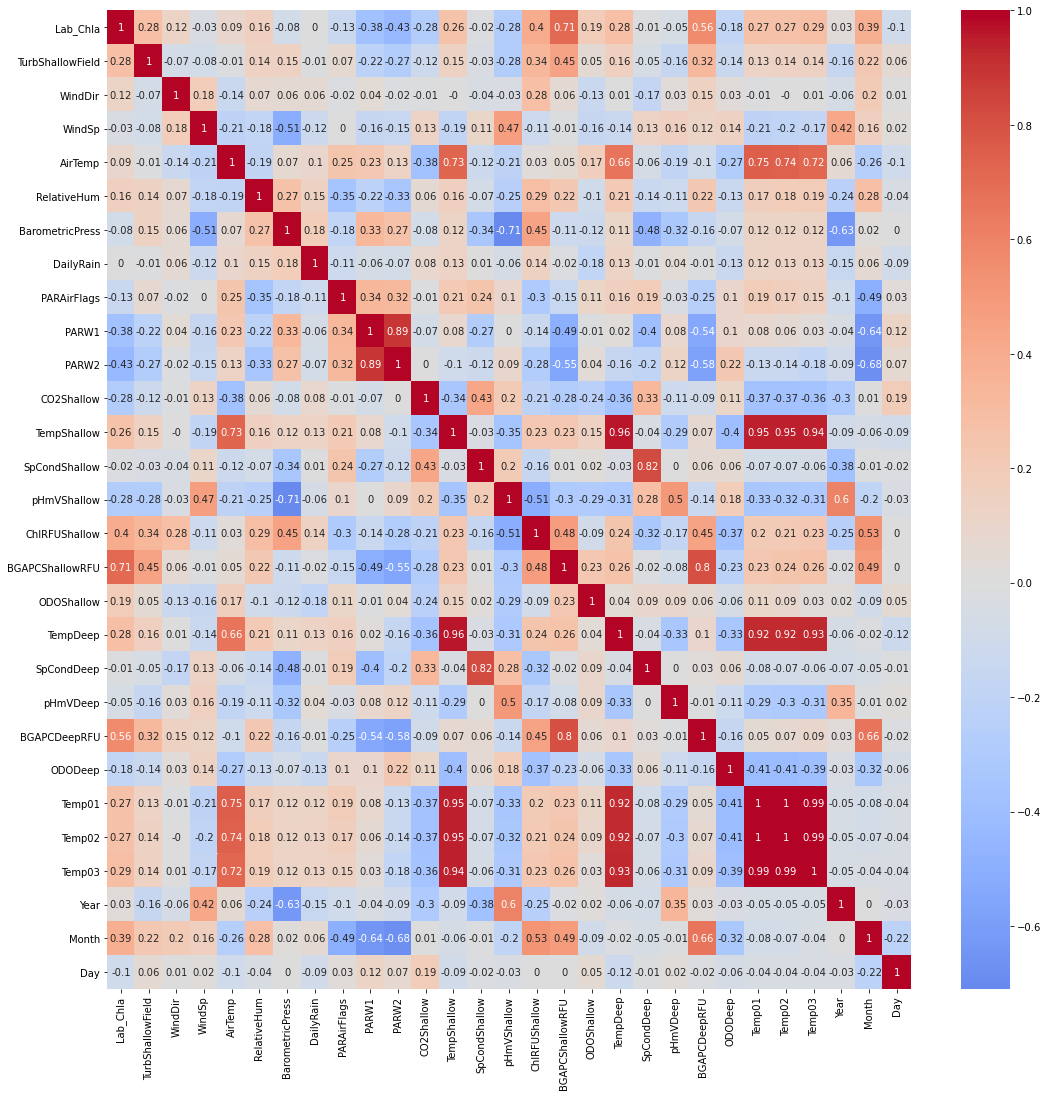

In [642]:
# plot the heatmap to see the correaltion of buoy parameters with lab chla
correlation_matrix = df_both.corr().round(2)  # it seems that this function is working even with nan values in data
plt.figure(figsize=(18,18))
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

In [643]:
# extract target as y from data
y = df_both['Lab_Chla']
X = df_both.drop(['Lab_Chla'], axis=1)
y.describe()

count    157.000000
mean      41.220075
std       39.772718
min        1.270000
25%       14.170000
50%       30.000000
75%       52.815000
max      270.000000
Name: Lab_Chla, dtype: float64

In [644]:
# a simple feature selection based on correlation with chla_lab and feature redundancy
filt_correlation = abs(correlation_matrix['Lab_Chla']) > .2
selected_features = X.columns[filt_correlation[1:]]
X = X[selected_features]
X.drop(['PARW1', 'TempDeep', 'Temp01', 'Temp02', 'Temp03'], axis = 1, inplace = True)
selected_features = X.columns

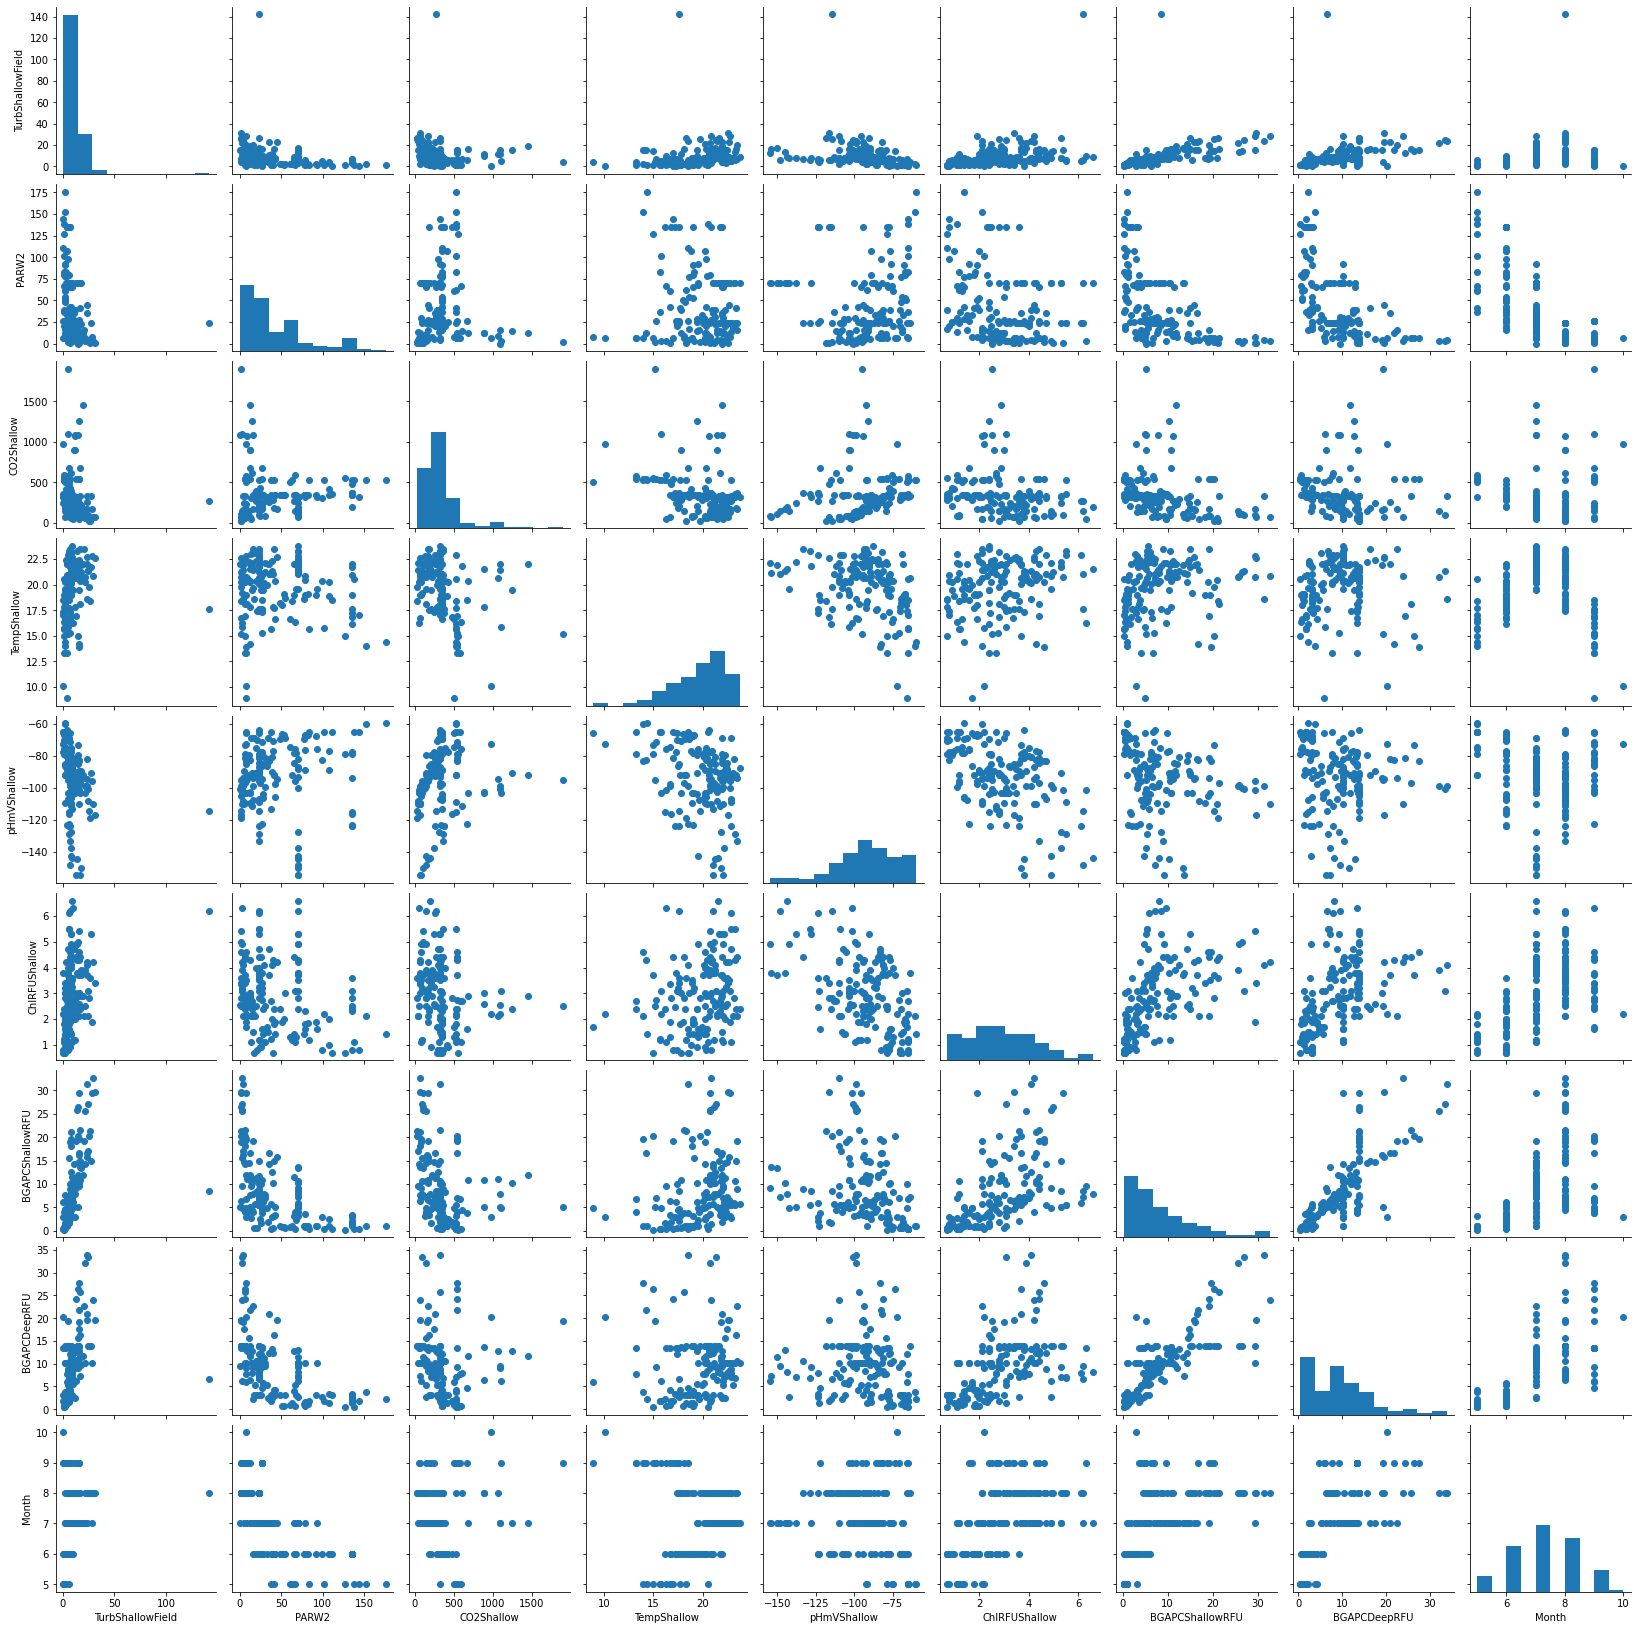

In [645]:
# to see the histogram of features
g = sb.PairGrid(data = X)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [646]:
# Using 'yeo-johnson' method to normalize distribution of features
from sklearn.preprocessing import PowerTransformer

yj = PowerTransformer(method='yeo-johnson', standardize=True)
X_trans_yj = pd.DataFrame(yj.fit(X).transform(X))
X_trans_yj.columns = selected_features

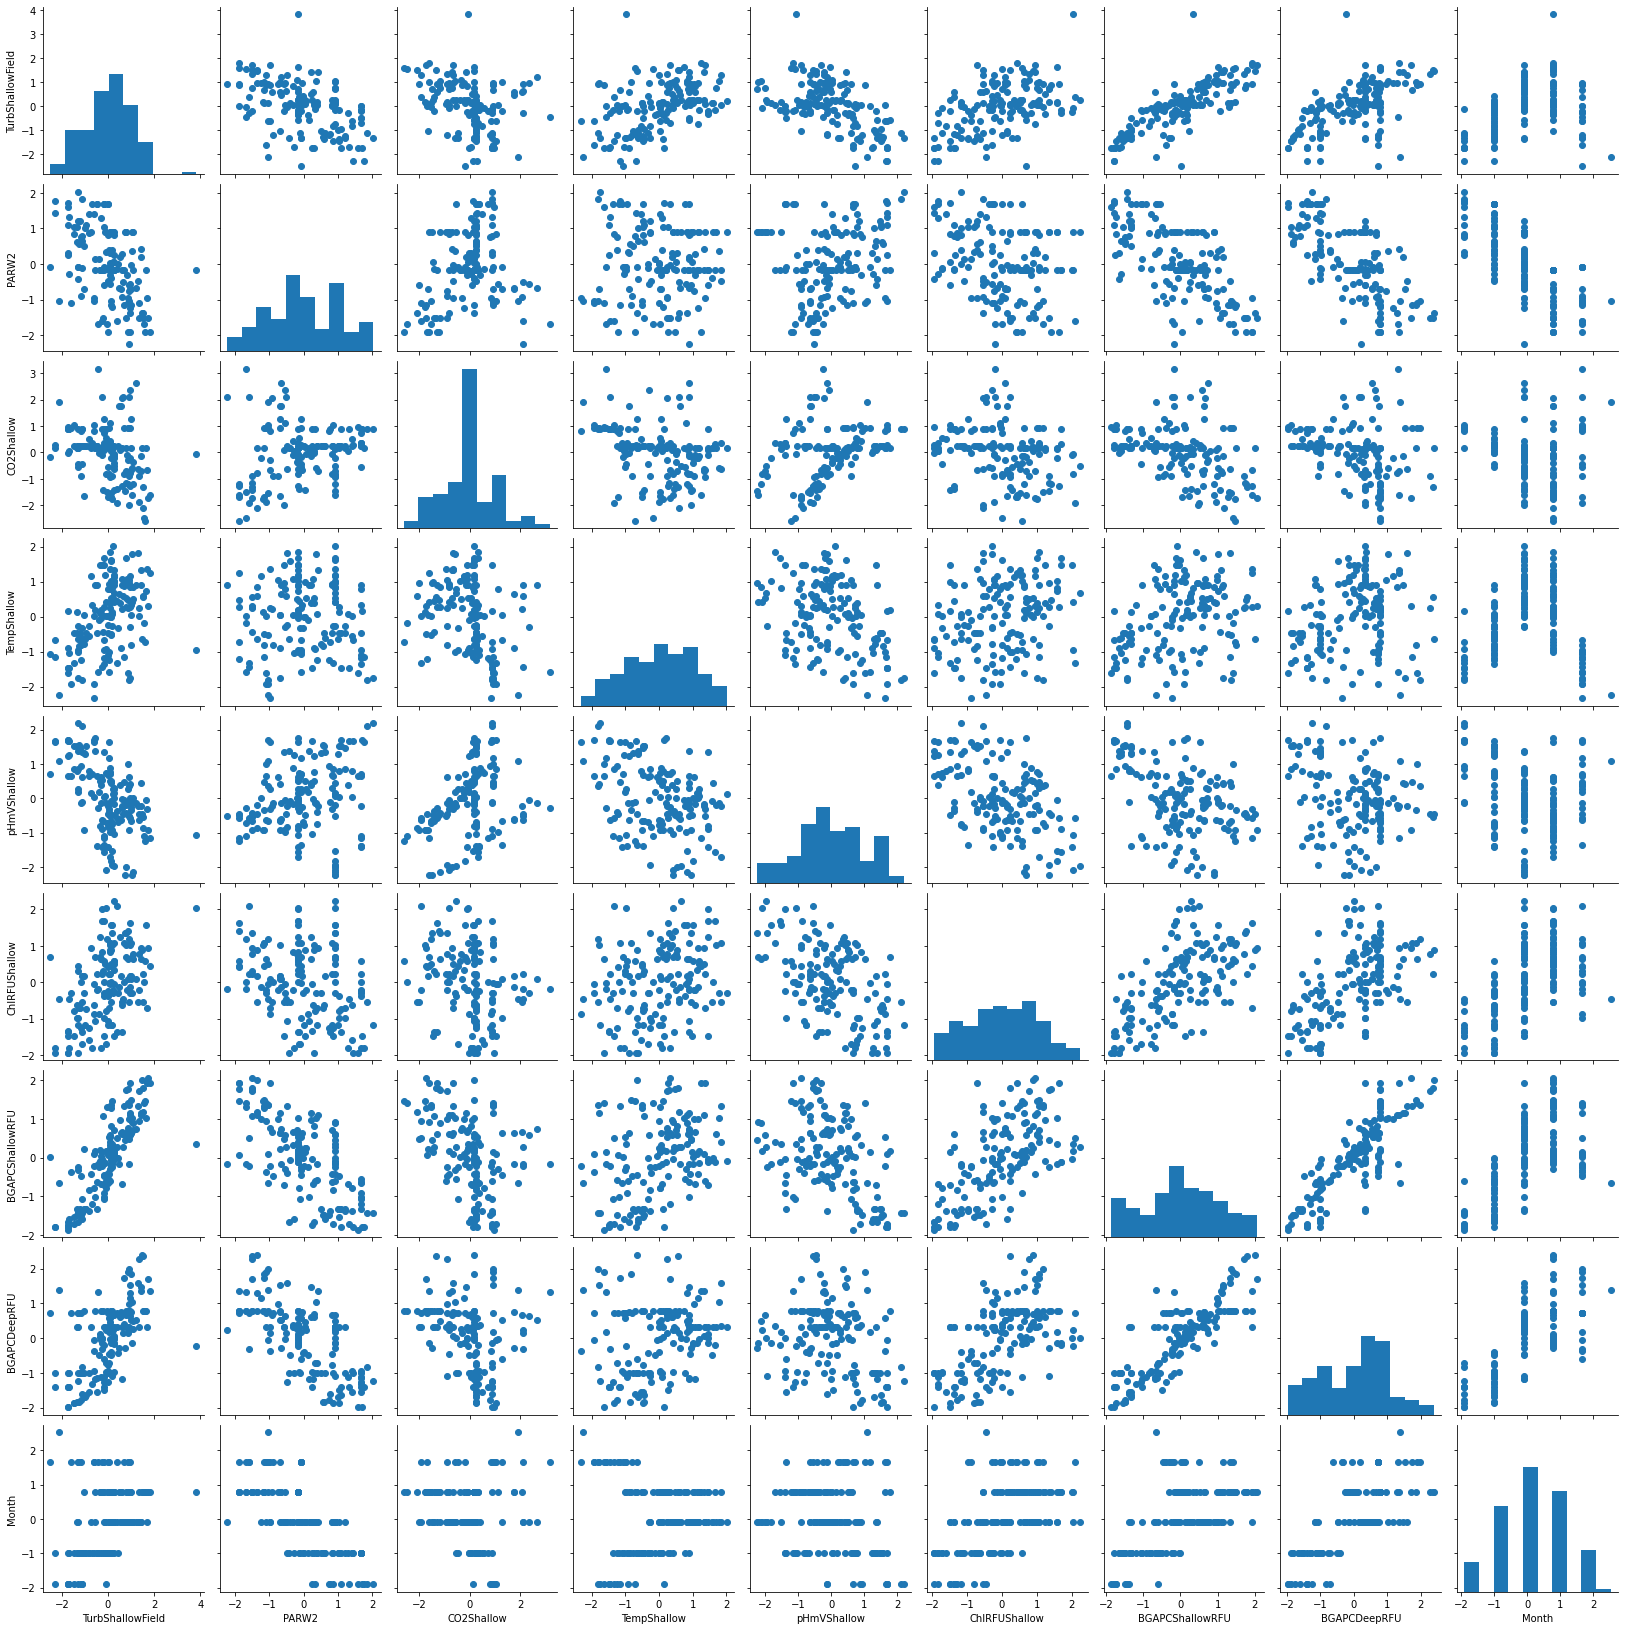

In [647]:
# recheck the distribution of data
g = sb.PairGrid(data = X_trans_yj)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [648]:
# Normalize the distribution of target using log-transformation
y_trans_log10 = np.log10(y)

In [649]:
# # Splitting data to test and train
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_trans_yj, y, train_size = .8 , random_state=0)

In [650]:
## import models
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

#model = DecisionTreeRegressor(max_depth=100)
#model = RandomForestRegressor(n_estimators=50, random_state=0)
#model = XGBRegressor(booster='gblinear',n_estimators=100, random_state=0, learning_rate = 0.1)
model = LinearRegression()

In [651]:
# create a pipeline
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline(steps=[('model', model)])

In [652]:
# cross validation and accuracy assessment of model
from sklearn.model_selection import cross_val_score
mae = 10**(-1 * cross_val_score(my_pipeline, X_trans_yj, y_trans_log10, cv=5, scoring='neg_mean_absolute_error').mean())
mae

1.4976110272285077

In [653]:
# getting predictions from cross validation
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(my_pipeline, X_trans_yj, y_trans_log10, cv=5)